In [1]:
from hestonpy.models.heston import Heston
from hestonpy.models.volatilitySmile import VolatilitySmile

import matplotlib.pyplot as plt 
import numpy as np

r = 0.00

# With real data

In [2]:
from hestonpy.option.data import get_options_data, filter_data_for_maturity

all_market_data, spot, maturities = get_options_data(symbol='AAPL')
maturities, spot

(('2025-03-21',
  '2025-03-28',
  '2025-04-04',
  '2025-04-11',
  '2025-04-17',
  '2025-04-25',
  '2025-05-16',
  '2025-06-20',
  '2025-07-18',
  '2025-08-15',
  '2025-09-19',
  '2025-10-17',
  '2025-12-19',
  '2026-01-16',
  '2026-03-20',
  '2026-06-18',
  '2026-12-18',
  '2027-01-15',
  '2027-06-17'),
 np.float64(213.49000549316406))

In [3]:
full_market_data = filter_data_for_maturity(all_market_data, maturities[2])
full_market_data.head(50)

,Call Price,Bid,Ask,Implied Volatility,Strike,Volume,Time to Maturity,Maturity
0,113.60,113.25,114.15,1.443362,100.0,1.0,0.075397,2025-04-04
1,108.45,103.15,104.20,1.253910,110.0,5.0,0.075397,2025-04-04
2,88.75,83.20,84.30,1.012700,130.0,4.0,0.075397,2025-04-04
3,99.60,73.30,74.35,0.913087,140.0,1.0,0.075397,2025-04-04
4,51.55,48.65,49.60,0.673831,165.0,17.0,0.075397,2025-04-04
5,70.20,43.60,44.55,0.598881,170.0,6.0,0.075397,2025-04-04
6,36.95,38.80,39.75,0.572026,175.0,2.0,0.075397,2025-04-04
7,34.25,33.80,34.75,0.507085,180.0,16.0,0.075397,2025-04-04
8,29.25,29.40,29.75,0.501958,185.0,81.0,0.075397,2025-04-04
9,24.55,24.60,25.05,0.461919,190.0,58.0,0.075397,2025-04-04


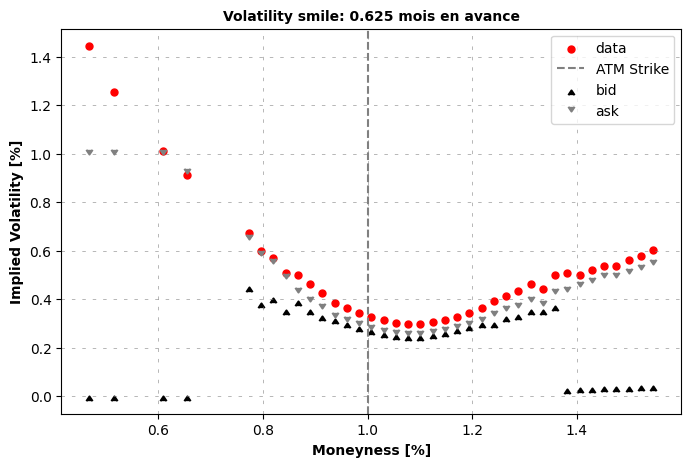

In [4]:
time_to_maturity = full_market_data['Time to Maturity'].iloc[0]
strikes = full_market_data['Strike'].values
bid_prices = full_market_data["Bid"].values
ask_prices = full_market_data['Ask'].values
market_ivs = full_market_data['Implied Volatility'].values
market_prices = full_market_data['Call Price'].values

marketVolatilitySmile = VolatilitySmile(
    strikes=strikes,
    time_to_maturity=time_to_maturity,
    atm=spot,
    market_ivs=market_ivs,
    r=r
)
marketVolatilitySmile.plot(bid_prices=bid_prices, ask_prices=ask_prices)

la iv du marché fait pas trop de sens, plutot utiliser $$\frac{\sigma_{bid}+\sigma_{ask}}{2}$$

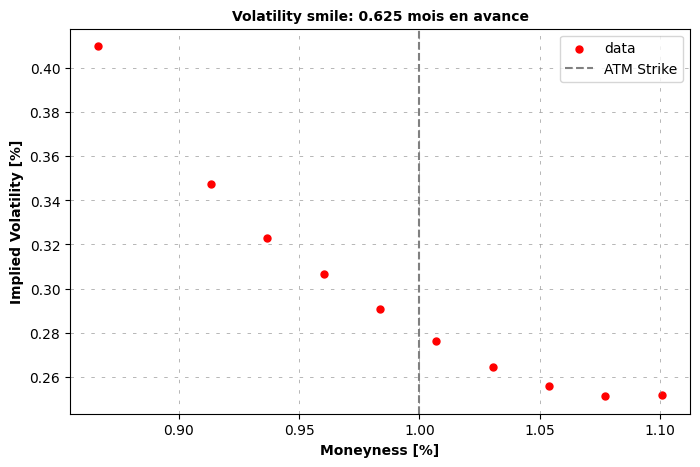

,Call Price,Bid,Ask,Implied Volatility,Strike,Volume,Time to Maturity,Maturity,Mid ivs,Ask ivs,Bid ivs,Mid Price
8,29.25,29.40,29.75,0.501958,185.0,81.0,0.075397,2025-04-04,0.409979,0.428080,0.391877,29.575
10,20.10,20.05,20.50,0.425909,195.0,37.0,0.075397,2025-04-04,0.347301,0.363136,0.331466,20.275
11,15.75,15.85,16.05,0.385504,200.0,68.0,0.075397,2025-04-04,0.322894,0.328693,0.317095,15.950
12,12.20,12.00,12.15,0.364142,205.0,169.0,0.075397,2025-04-04,0.306803,0.310481,0.303125,12.075
13,8.75,8.55,8.70,0.344611,210.0,658.0,0.075397,2025-04-04,0.290513,0.293820,0.287207,8.625
14,5.90,5.70,5.80,0.326301,215.0,3612.0,0.075397,2025-04-04,0.276046,0.278187,0.273906,5.750
15,3.65,3.50,3.60,0.312751,220.0,2311.0,0.075397,2025-04-04,0.264369,0.266664,0.262072,3.550
16,2.03,2.00,2.06,0.302131,225.0,1301.0,0.075397,2025-04-04,0.255969,0.257621,0.254317,2.030
17,1.12,1.06,1.12,0.297126,230.0,3816.0,0.075397,2025-04-04,0.251139,0.253355,0.248922,1.090
18,0.60,0.56,0.60,0.297614,235.0,911.0,0.075397,2025-04-04,0.251540,0.253682,0.249397,0.580


In [5]:
market_data = marketVolatilitySmile.filters(full_market_data)
marketVolatilitySmile.plot()
market_data

Initial Parameters: kappa=4.80791082348118 | theta=0.19093793128842793 | sigma=2.0 | rho=-0.5016027525491065

at minimum 0.080644 accepted 1
Parameters: kappa=4.8079108295653175 | theta=0.1909375868093824 | sigma=2.0 | rho=-0.50160225316981

at minimum 0.080645 accepted 1
Parameters: kappa=4.772060125147909 | theta=0.19179988755708355 | sigma=2.0 | rho=-0.5013720521908386

at minimum 0.080644 accepted 1
Parameters: kappa=4.802365996967597 | theta=0.19107010044929382 | sigma=2.0 | rho=-0.5015644130706324

at minimum 0.081076 accepted 1
Parameters: kappa=4.124811130640966 | theta=0.21008447852010714 | sigma=2.0 | rho=-0.49866310738442393

at minimum 0.080644 accepted 1
Parameters: kappa=4.808300741712248 | theta=0.19092849039985782 | sigma=2.0 | rho=-0.5016006442707764

at minimum 0.080646 accepted 1
Parameters: kappa=4.76012706578162 | theta=0.19209056248057194 | sigma=2.0 | rho=-0.5012973961123764

at minimum 0.080661 accepted 1
Parameters: kappa=4.664455000631598 | theta=0.19446933983

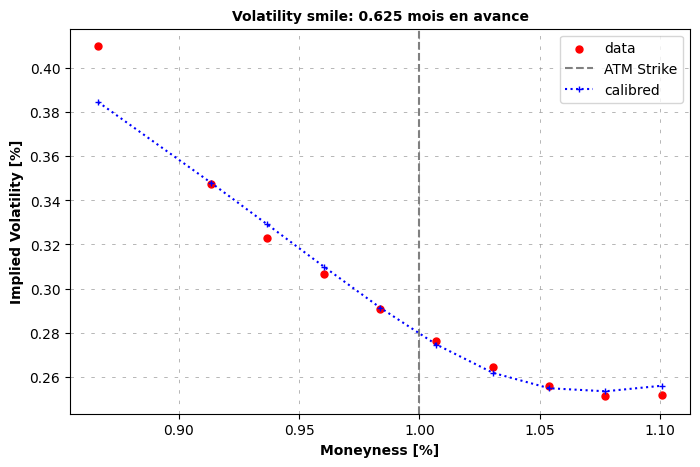

{'vol_initial': np.float64(0.07620167016224999),
 'kappa': np.float64(4.808300741712248),
 'theta': np.float64(0.19092849039985782),
 'drift_emm': 0,
 'sigma': np.float64(2.0),
 'rho': np.float64(-0.5016006442707764)}

In [7]:
params = {
    "vol_initial": 0.06,
    "kappa": 1.25,
    "theta": 0.06,
    "drift_emm": 0.00,
    "sigma": 0.6,
    "rho": -0.8,
}
heston = Heston(spot=spot, r=r, **params)

initial_params = marketVolatilitySmile.calibration(
    price_function=heston.call_price,
    guess_correlation_sign='negative',
    initial_guess=[params['kappa'], params['theta'], params['sigma'], params['rho']],
    speed='local',
)

calibrated_params = marketVolatilitySmile.calibration(
    price_function=heston.call_price,
    guess_correlation_sign='negative',
    initial_guess=[initial_params['kappa'], initial_params['theta'], initial_params['sigma'], initial_params['rho']],
    speed='global',
)

marketVolatilitySmile.plot(
    calibrated_prices=heston.call_price(strike=marketVolatilitySmile.strikes, time_to_maturity=time_to_maturity, **calibrated_params)
)
calibrated_params

# SVI

['success condition satisfied'] True


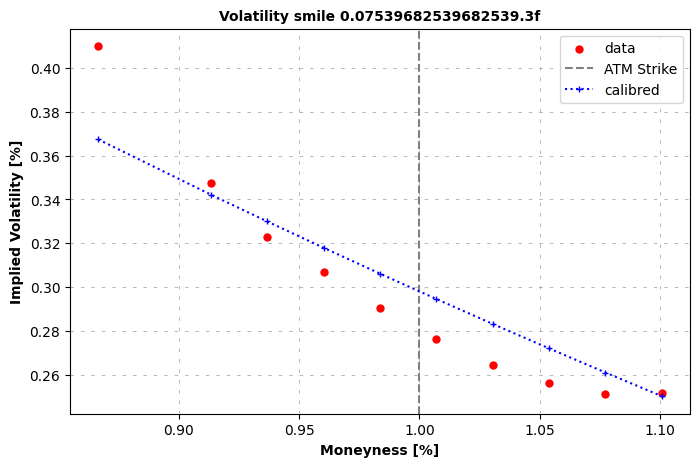

In [ ]:
calibrated_params, raw_svi_ivs = marketVolatilitySmile.svi_smooth(select_svi_ivs=False)
marketVolatilitySmile.plot(raw_svi_ivs)

['success condition satisfied'] True


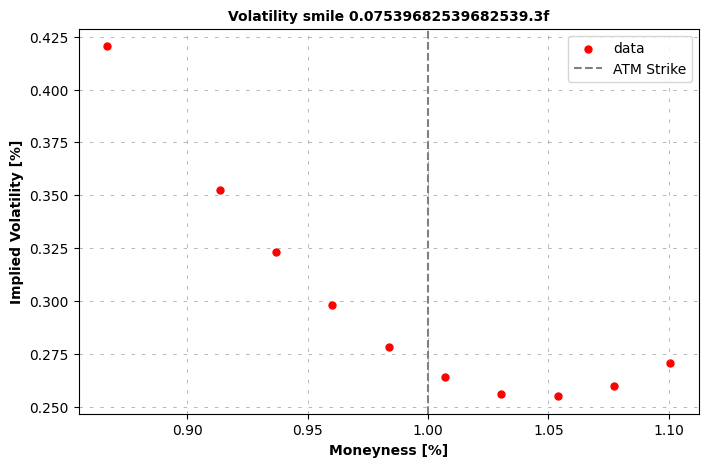

Initial Parameters: kappa=1.25 | theta=0.06 | sigma=0.06 | rho=-0.8

at minimum 0.080163 accepted 1
Parameters: kappa=3.922654875437953 | theta=0.2561111164580391 | sigma=2.0 | rho=-0.504297072099383

at minimum 0.080163 accepted 1
Parameters: kappa=3.9233599362617793 | theta=0.2560777868861253 | sigma=2.0 | rho=-0.504300462622207



KeyboardInterrupt: 

In [ ]:
calibrated_params, raw_svi_ivs = marketVolatilitySmile.svi_smooth(select_svi_ivs=True)
marketVolatilitySmile.plot()

params = {
    "vol_initial": 0.06,
    "kappa": 1.25,
    "theta": 0.06,
    "drift_emm": 0.00,
    "sigma": 0.6,
    "rho": -0.5,
}
heston = Heston(spot=spot, r=r, **params)

calibrated_params = marketVolatilitySmile.calibration(
    price_function=heston.call_price,
    guess_correlation_sign='negative',
    initial_guess=[1.25, 0.06, 0.06, -0.8],
    speed='global',
)

marketVolatilitySmile.plot(
    calibrated_prices=heston.call_price(strike=marketVolatilitySmile.strikes, time_to_maturity=time_to_maturity, **calibrated_params)
)
calibrated_params